# SciPy - Equações Diferenciais
## Andre Nepomuceno - UFF

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

**Exemplo 1 - Uma eq. de primeira ordem**

In [69]:
def dydt(t,y):
    return -k*y

In [70]:
k = 0.2
#valor de y em t = 0
y0 = 100
#intervalo de tempo
t0, tf = 0,20

In [71]:
solve_ivp (dydt , (t0 , tf), y0 = [y0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.70695962,
       15.30158659, 19.89621357, 20.        ])
 t_events: None
        y: array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         11.76477081,   4.69665094,   1.87496471,   1.83644668]])

In [72]:
sol1 = solve_ivp (dydt ,(t0, tf), [y0])
sol1.y

array([[100.        ,  97.27826059,  73.81996665,  29.46989971,
         11.76477081,   4.69665094,   1.87496471,   1.83644668]])

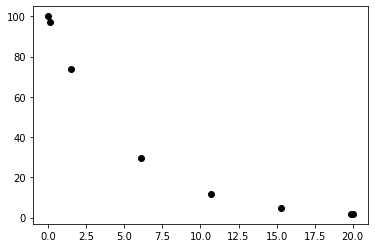

In [73]:
plt.plot(sol1.t,sol1.y[0],'ok')

Para obter a solução com uma maior resolução temporal, podemos passar um array para o argumenot **t_eval**

In [74]:
tpoints = np.linspace(t0,tf,30)

In [67]:
sol2 = solve_ivp (dydt, (t0, tf), [y0],t_eval=tpoints)
t,y = sol2.t, sol2.y[0]

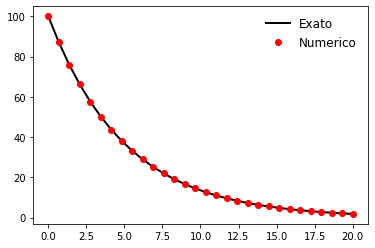

In [68]:
#Vamos comparar a solução numérica e exata
f = lambda t: y0*np.exp(-k*t)
plt.plot(sol2.t, f(sol2.t),'k-',lw=2,label='Exato')
plt.plot(sol2.t, sol2.y[0],'ro',label='Numerico')
plt.legend(frameon=False,fontsize=12)

**Exemplo 2 - EDOs acopladas**
\begin{eqnarray*}
\frac{dS}{dt}& = &-\beta SI, \\
\frac{dI}{dt}& = &\beta SI - \gamma I, \\
\frac{dR}{dt}& = & \gamma I, \\
\end{eqnarray*}

In [43]:
#Definir N e valores iniciais
N = 100000
I0 = 2
S0 = N-2
R0 = 0
t0,tf = 0,120 #120 dias

In [44]:
#definir as funcoes
def dydt(t,y,beta=5.0e-6,gamma=0.2):
    S,I,R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [47]:
sol3 = solve_ivp(dydt,(t0, tf), y0=[S0,I0,R0],dense_output=True)
#sol3 = solve_ivp(dydt,(t0, tf), y0=[S0,I0,R0],args=(beta,gamma)) (scipy > 1.4)
print(sol3.success)

True


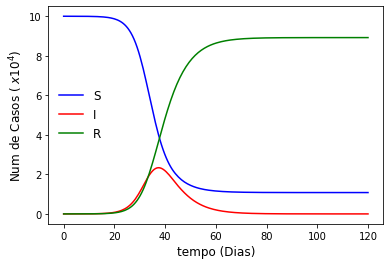

In [65]:
#vamos plotar as soluções
t = np.linspace(t0,tf,200)
st = sol3.sol(t)[0]/1e4
it = sol3.sol(t)[1]/1e4
rt = sol3.sol(t)[2]/1e4
plt.plot(t,st,'b',label='S')
plt.plot(t,it,'r',label='I')
plt.plot(t,rt,'g',label='R')
plt.xlabel('tempo (Dias)',fontsize=12)
plt.ylabel('Num de Casos ( $x 10^4$)',fontsize=12)
plt.legend(frameon=False,loc='center left',fontsize=12)

**Exemplo 3 - EDOs de Segunda Ordem**
\begin{equation}
    \frac{d^2x}{dt^2} \,=\, - \omega^2 x \nonumber
\end{equation}

In [67]:
#fazemos x1 = x e x2 = dx/dt (velc.)
#dx1/dt = x2
#dx2/dt = -omega^2x1

In [68]:
omega = 0.9
A = 3
v0 = 0
t0,tf = 0,20

In [69]:
def dxdt(t,x):
    x1,x2 = x
    dx1dt = x2
    dx2dt = -omega**2*x1
    return dx1dt,dx2dt

In [73]:
sol4 = solve_ivp(dxdt,(t0,tf),y0=[A,v0],dense_output=True)
print(sol4.success)

True


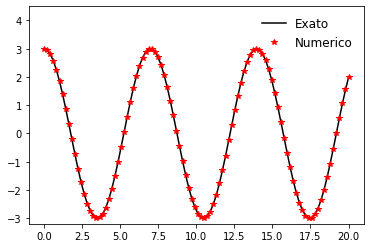

In [85]:
#plot solução
t = np.linspace(t0,tf,100)
x_ext = lambda x: A*np.cos(omega*t)
plt.plot(t,x_ext(t),'k',label='Exato')
plt.plot(t,sol4.sol(t)[0],'r*',label='Numerico')
plt.ylim(-3.2,4.5)
plt.legend(frameon=False,fontsize=12,loc='upper right')

**Exemplo 4 - "Stiff Problem"**
\begin{eqnarray*}
\dot x \, \equiv \, \frac{dx}{dt} &= &-0.04x + 10^4yz, \\
\dot y \, \equiv \, \frac{dy}{dt}& = &0.04x -  10^4yz - 3 \times 10^7 y^2, \\
\dot z \, \equiv \, \frac{dz}{dt}& = &3 \times 10^7 y^2. \\
\end{eqnarray*}

In [75]:
def deriv(t,Y):
    x,y,z = Y
    xdot = -0.04*x + 1.e4*y*z
    ydot = 0.04*x - 1.e4*y*z - 3.e7*y**2
    zdot = 3.e7*y**2
    return xdot, ydot, zdot

In [76]:
#tempo entre 0 e 500
t0,tf = 0,500
y0 = [1.,0,0]
#tpoints = np.linspace(t0,tf,10000)

In [77]:
sol5 = solve_ivp(deriv,(t0,tf), y0=y0)
print(sol5)

  message: 'Required step size is less than spacing between numbers.'
     nfev: 11168
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.00000000e+00, 6.36669332e-04, 1.06518798e-03, ...,
       1.67028961e+00, 1.67028961e+00, 1.67028961e+00])
 t_events: None
        y: array([[ 1.00000000e+00,  9.99974534e-01,  9.99957394e-01, ...,
        -8.36811057e+02, -1.36054598e+03, -2.19689744e+03],
       [ 0.00000000e+00,  2.20107324e-05,  3.00616449e-05, ...,
        -2.51160357e+06, -4.08176067e+06, -6.58914204e+06],
       [ 0.00000000e+00,  3.45561028e-06,  1.25439771e-05, ...,
         2.51244138e+06,  4.08312221e+06,  6.59133994e+06]])


In [78]:
sol6 = solve_ivp(deriv,(t0,tf), y0=y0,method='Radau')
print(sol6)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 248
     njev: 14
      nlu: 60
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 7.06687545e-04, 1.47212739e-03, 2.61769904e-03,
       3.80990518e-03, 7.40319795e-03, 1.99267900e-02, 9.15997472e-02,
       3.15874718e-01, 9.63977911e-01, 1.61208110e+00, 2.95571284e+00,
       4.72814194e+00, 7.40529599e+00, 1.10497294e+01, 1.66227965e+01,
       2.43514183e+01, 3.62943316e+01, 5.30400460e+01, 7.90938774e+01,
       1.15745229e+02, 1.72751217e+02, 2.52482643e+02, 3.75561500e+02,
       5.00000000e+02])
 t_events: None
        y: array([[1.00000000e+00, 9.99971733e-01, 9.99941120e-01, 9.99895320e-01,
        9.99847678e-01, 9.99704224e-01, 9.99205871e-01, 9.96401273e-01,
        9.88109568e-01, 9.67486618e-01, 9.50502923e-01, 9.22677981e-01,
        8.95131183e-01, 8.64276025e-01, 8.33393627e-01, 7.98937874e-01,
        7.64261851e-01, 7.25604540e-01, 6.86701763e-01

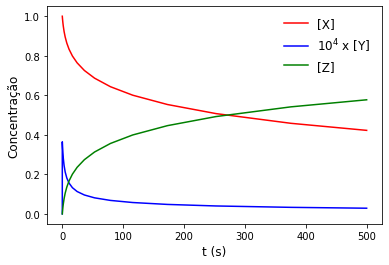

In [79]:
#Plotar a solução
YFAC = 1e4
plt.plot(sol6.t,sol6.y[0],'r',label='[X]')
plt.plot(sol6.t,YFAC*sol6.y[1],'b',label='$10^4$ x [Y]')
plt.plot(sol6.t,sol6.y[2],'g',label='[Z]')
plt.xlabel('t (s)',fontsize=12)
plt.ylabel('Concentração',fontsize=12)
plt.legend(frameon=False, fontsize=12)

**Exemplo 5 - Incluir Evento**
\begin{equation}
\frac{dv}{dt} = -3
\end{equation}

In [80]:
#função evento
def carro_parado(t,y):
    return y[0]

In [87]:
def vel(t,y):
    return -3

In [88]:
t0, tf = 0, 50
v0 = 20.

In [89]:
sol7 = solve_ivp(vel,(t0,tf),y0=[v0],events=carro_parado)
print(sol7)

  message: 'A termination event occurred.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.        , 0.14614572, 1.60760288, 6.66666667])
 t_events: [array([6.66666667])]
        y: array([[ 2.00000000e+01,  1.95615629e+01,  1.51771914e+01,
        -1.77635684e-15]])


In [90]:
carro_parado.terminal=True
solve_ivp(vel,(t0,tf),y0=[v0],events=carro_parado)

  message: 'A termination event occurred.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.        , 0.14614572, 1.60760288, 6.66666667])
 t_events: [array([6.66666667])]
        y: array([[ 2.00000000e+01,  1.95615629e+01,  1.51771914e+01,
        -1.77635684e-15]])

In [53]:
#Valor esperado:
20/3.

6.666666666666667